# Classification Using KNN
In this project we are are going to classify and labeling test data using KNN with two "Eqluducian Distant" and "Cosine Cimilarity" methods.

In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style

In [6]:
#read dataset by path and file's name
def read_dataset(path, name):
    df = pd.read_csv(path + name)
    return df

In [7]:
df_training = read_dataset("datasets/segmentation/", "segmentation.Train.csv")
df_testing = read_dataset("datasets/segmentation/", "segmentation.test.csv")

## KNN

In [18]:
def KNN(df_training, df_testing, k, similarityMethod):
    df_train = df_training.iloc[:, 1:].copy()
    train_labels = df_training.iloc[:,0].copy()
    df_test = df_testing.iloc[:, 1:].copy()

    label = []
    if similarityMethod == "eqluducianDistance":
        for i in range(0, len(df_test)):
            eqluducian_distance = np.sqrt(np.power(df_train - df_test.iloc[i], 2).sum(axis=1).values)

            idx = np.argpartition(eqluducian_distance, k)[:k]
            label.append(train_labels.iloc[idx].mode().values[0])
            # print(train_labels.iloc[idx].mode().values[0])
    
    if similarityMethod == "cosineSimilarity":
        len_train = np.sqrt(np.power(df_train, 2).sum(axis = 1))
        len_test = np.sqrt(np.power(df_test, 2).sum(axis = 1))
        for i in range(0, len(df_test)):
            cosine_similarity = (df_train * df_test.iloc[i]).sum(axis=1).values / (len_train * len_test[i])

            idx = np.argpartition(cosine_similarity, -k)[-k:]
            label.append(train_labels.iloc[idx].mode().values[0])

    return label

## plotting per different Ks

In [24]:
def plot_accuracy_perK(df_training, df_testing, k, similarityMethod):
    axis = []
    k_list = []
    # just odd Ks
    for i in range(1, k + 1, 2):
        label = KNN(df_training, df_testing, i, similarityMethod)
        accuracy = (df_testing['LABEL'] == label).sum() / len(df_testing)
        # print(accuracy)
        axis.append(accuracy)
        k_list.append(i)

    plt.xlabel("K")
    plt.ylabel("accuracy")
    plt.title("Accuracy per k in KNN using " + similarityMethod)
    plt.plot(k_list, axis, label = "KNN")
    plt.show()

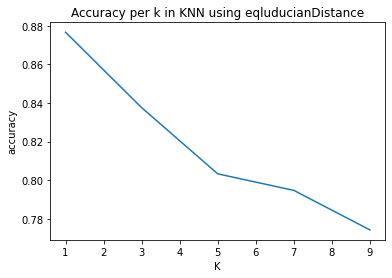

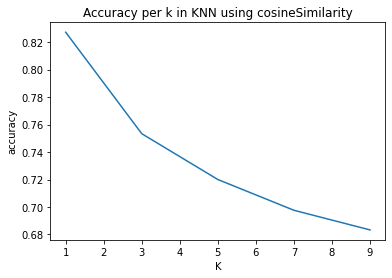

In [25]:
plot_accuracy_perK(df_training, df_testing, 9, "eqluducianDistance")
plot_accuracy_perK(df_training, df_testing, 9, "cosineSimilarity")
